# A Job Recommender System

In that project I will try to build a job recommendation system using cosine similarity. But firstly I will make three wordclouds.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Jobs/jobs.csv')

In [3]:
df.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [4]:
df.isnull().sum()

Unnamed: 0                 0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27010 entries, 0 to 27009
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               27010 non-null  int64 
 1   Job Salary               27010 non-null  object
 2   Job Experience Required  27010 non-null  object
 3   Key Skills               27010 non-null  object
 4   Role Category            27010 non-null  object
 5   Functional Area          27010 non-null  object
 6   Industry                 27010 non-null  object
 7   Job Title                27010 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [6]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [7]:
import matplotlib.pyplot as plt

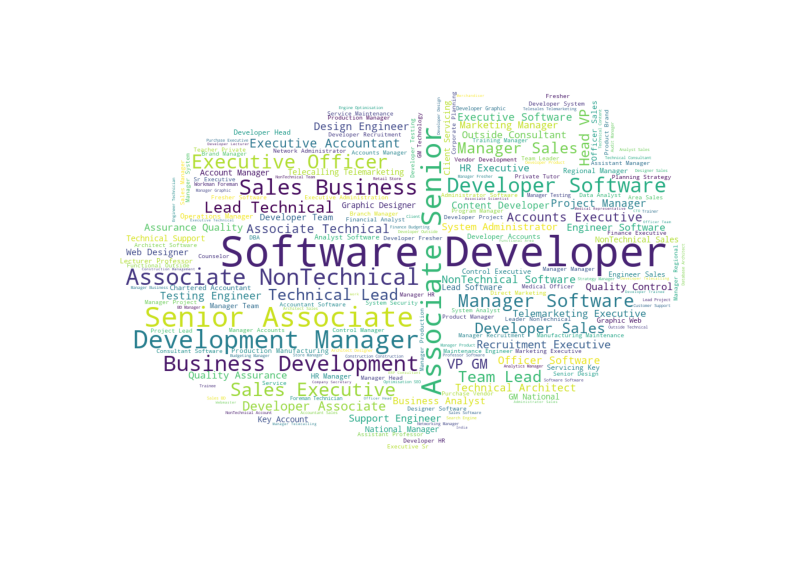

In [8]:
wc(df['Job Title'],'white')

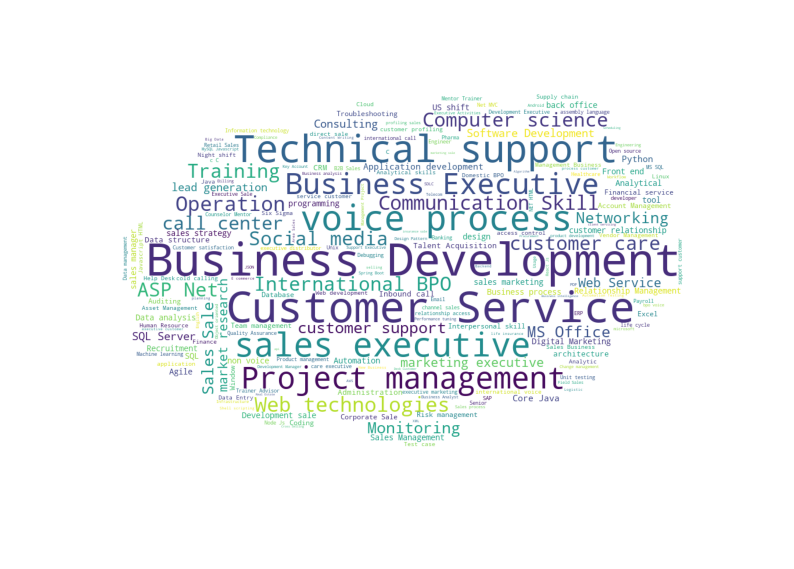

In [9]:
wc(df['Key Skills'],'white')

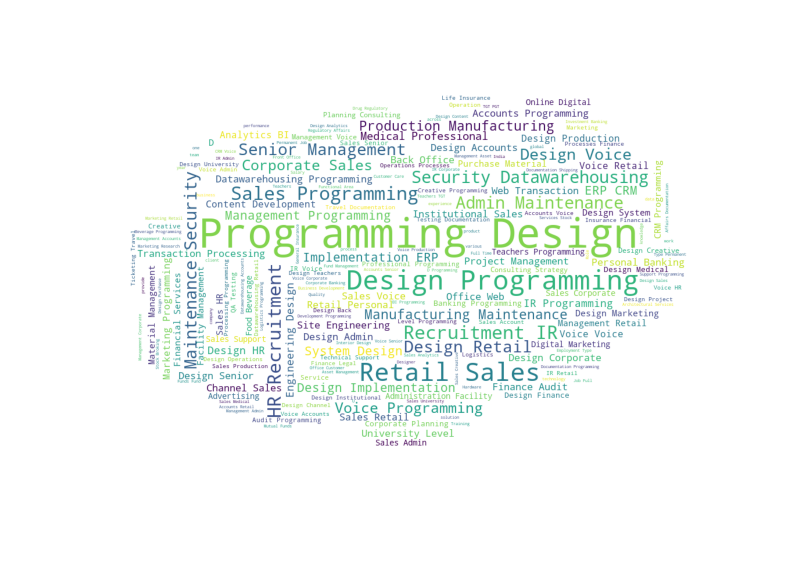

In [10]:
wc(df['Role Category'],'white')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [12]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [13]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [14]:
df["Key Skills"]=df["Key Skills"].str.lower()
df["Key Skills"]=df["Key Skills"].str.replace('[^\w\s]','',regex=True)
df["Key Skills"]=df["Key Skills"].str.replace('\n','')
df["Key Skills"]=df["Key Skills"].str.replace('\d+','',regex=True)

In [15]:
matrix=vect.fit_transform(df["Key Skills"])

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [16]:
from scipy import spatial
def compute_distance(a,b):
    genre_distance=spatial.distance.cosine(a[1],b[1])
    popularity_distance=abs(a[2]-b[2])
    return genre_distance+popularity_distance

In [17]:
matrix=pd.DataFrame(matrix.toarray())

In [18]:
df=pd.concat([df,matrix],axis=1)

In [19]:
df.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title,0,1,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,Not Disclosed by Recruiter,5 - 10 yrs,media planning digital media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales closing software knowledge clients ...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Not Disclosed by Recruiter,0 - 1 yrs,computer science fabrication quality check in...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,technical support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing test engineering test cases we...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.to_csv('Jobs/jobs_2.csv',index=False)

In [24]:
df=pd.read_csv('Jobs/jobs_2.csv')

In [25]:
for col in df.columns[8:10000]:
    df[col] = df[col].apply(lambda x: 1 if isinstance(x, str) else x)

In [27]:
df.to_csv('Jobs/jobs_2.csv',index=False)

In [40]:
job_dict={}
with open('Jobs/jobs_2.csv') as f:
    next(f)
    for line in f:
        fields=line.rstrip('\n').split(',')
        job_id=int(fields[0])
        name=fields[7]
        description=fields[8:10000]
        description=list(map(int,description))
        job_dict[job_id]=(name,description)

In [43]:
compute_distance(job_dict[1],job_dict[2])

56.577


In that project I made a job recommendation system using cosine similarity. I also use CountVectorizer to vectorize the job description and TF-IDF.